In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='svg'

### A simple example

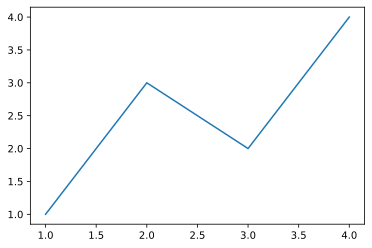

In [2]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 3, 2, 4]);

### Parts of Figure

#### Figure

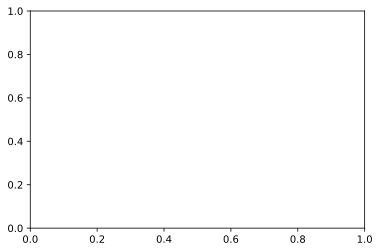

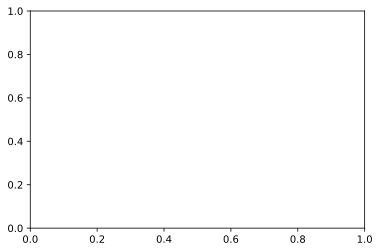

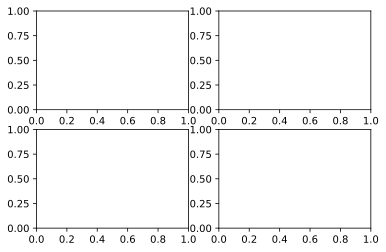

In [3]:
fig = plt.figure() # an empty figure with no axes
ax = fig.subplots() # create one axes

fig, ax = plt.subplots() # a figure with a single axes
fig, axs = plt.subplots(2, 2) # a figure with a 2x2 grid of axes

#### Axes

Axes附属于Figure,通常包含2各坐标轴(axis),刻度, label, title

#### Axis

axis设置scale limit, 刻度, axis label

### Types of inputs to plotting functions

Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray.

In [4]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

Most methods will also parse an addressable object like a dict, a numpy.recarray, or a pandas.DataFrame. Matplotlib allows you provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

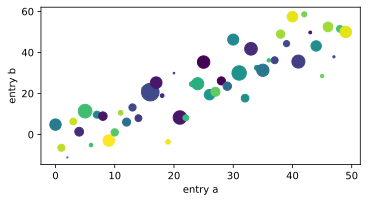

In [5]:
np.random.seed(19680801)
data = {'a': np.arange(50),
       'c': np.random.randint(0, 50, 50),
       'd': np.random.randn(50)}
data['b'] = data['a'] + 10*np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained') # constrained layout adjust subplots and fit artists best as it can
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

### Coding Style

#### The explicit and the implicit interfaces

As noted, there are essentially two ways to use Matplotlib:

* Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

* Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

#### OO-style

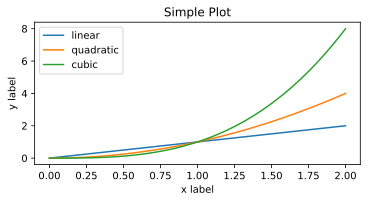

In [6]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Simple Plot')
ax.legend();

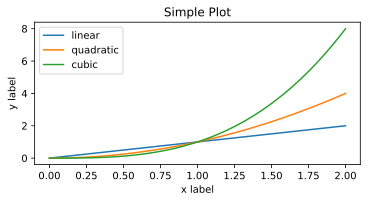

In [7]:
x = np.linspace(0, 2, 100)
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend();

### Maker a Helper Functions

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [8]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

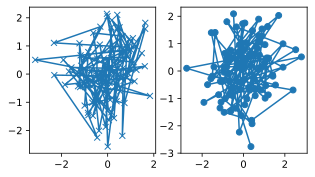

In [9]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### Styling Artists

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. <br>
In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

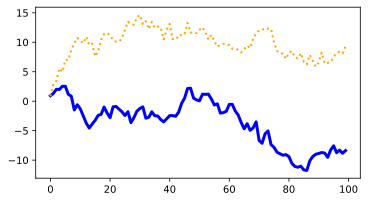

In [10]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='-')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

#### Colors

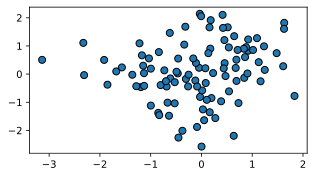

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

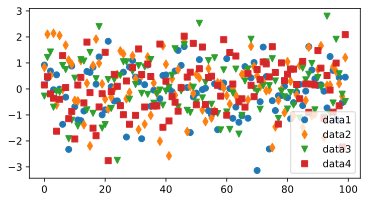

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

### Labelling plots

#### Axes labels and text
* ax.set_xlabel, ax.set_ylabel, ax.set_title, ax.text
* plt.xlabel, plt.ylabel, plt.title

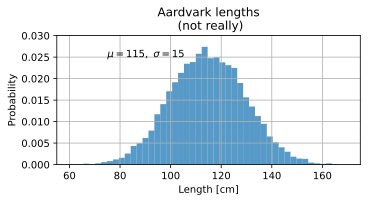

In [13]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115, \ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

### Axis scales and ticks

#### Scales

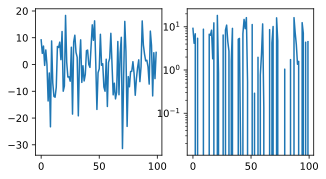

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7))
xdata = np.arange(len(data1))
data = 10 * data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

#### Tick locators and formatters

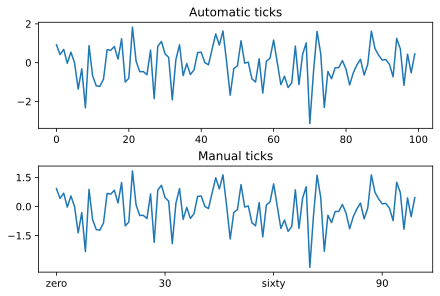

In [15]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])
axs[1].set_title('Manual ticks');

#### Plotting dates and strings

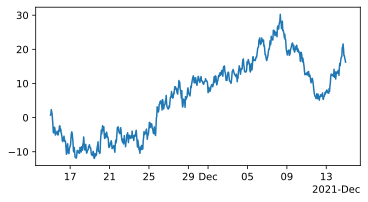

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-15'), np.timedelta64(1, 'h'))

data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

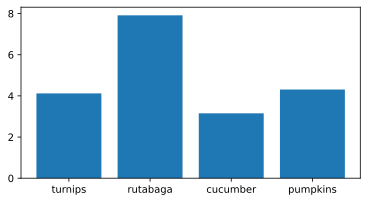

In [22]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)) * 10);

#### Color mapped data

In [25]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax = axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()');

### Working with multiple Figures and Axes

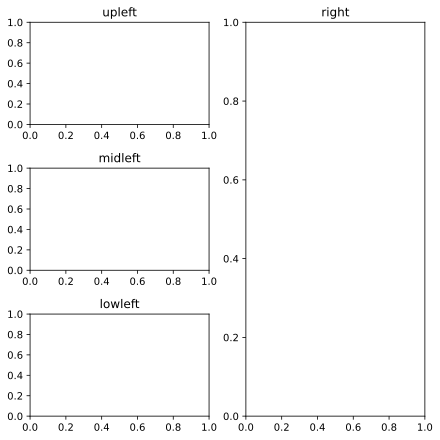

In [31]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'], ['midleft', 'right'], ['lowleft', 'right']], layout='constrained', figsize=(6, 6))
axd['upleft'].set_title('upleft')
axd['midleft'].set_title('midleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');